In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from imblearn.over_sampling import *
from imblearn.under_sampling import RandomUnderSampler

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# 데이터 입력
df = pd.read_csv('../dataset/sonar.csv')


1 Physical GPUs, 1 Logical GPUs


In [2]:

# 데이터 분류
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

#Y_encoded = tf.keras.utils.to_categorical(Y)



In [3]:

# 전체 데이터에서 학습 데이터와 테스트 데이터로 구분
X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=1)
## 학습 셋에서 학습과 검증 데이터로 구분
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.1, shuffle=True, random_state=1)

print(Y)
print(X_train.shape)
print(Y_train.shape)
print(Y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(167, 60)
(167,)
[1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0
 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0
 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1]


In [5]:

# 모델의 설정

input_Layer = tf.keras.layers.Input(shape=(60,))
x = tf.keras.layers.Dense(30, activation='sigmoid')(input_Layer)
x = tf.keras.layers.Dense(10, activation='sigmoid')(x)
Out_Layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)
#Out_Layer= tf.keras.layers.Dense(1, activation='softmax')

model = tf.keras.models.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense (Dense)                (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,151
Trainable params: 2,151
Non-trainable params: 0
_________________________________________________________________


In [6]:


# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer =tf.keras.optimizers.SGD(learning_rate=0.05)
metrics=tf.keras.metrics.binary_accuracy

model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])

## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
result=model.fit(X_train, Y_train, epochs=1000, batch_size=50, validation_data=(X_valid,Y_valid)) # validation_data=(X_valid,Y_valid)을 추가하여 학습시 검증을 해줌.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 확인하여 무엇을 받고 있는지 확인.
print(result.history.keys())


Epoch 1/1000
4/4 [==============================] - 1s 98ms/step - loss: 0.6911 - binary_accuracy: 0.5269 - val_loss: 0.6851 - val_binary_accuracy: 0.5789
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6917 - binary_accuracy: 0.5269 - val_loss: 0.6849 - val_binary_accuracy: 0.5789
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6913 - binary_accuracy: 0.5269 - val_loss: 0.6834 - val_binary_accuracy: 0.5789
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6925 - binary_accuracy: 0.5269 - val_loss: 0.6828 - val_binary_accuracy: 0.5789
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6912 - binary_accuracy: 0.5269 - val_loss: 0.6825 - val_binary_accuracy: 0.5789
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6917 - binary_accuracy: 0.5269 - val_loss: 0.6833 - val_binary_accuracy: 0.5789
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss

KeyError: 'categorical_accuracy'

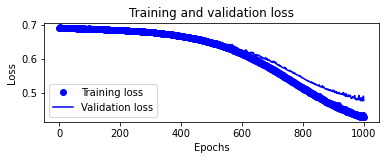

In [7]:

### result에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### result에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
#acc = result.history['categorical_accuracy']
#val_acc = result.history['val_categorical_accuracy']
acc = result.history['binary_accuracy']
val_acc = result.history['val_binary_accuracy']

### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




In [ ]:
# model.evalueate를 통해 테스트 데이터로 정확도 확인하기.
## model.evaluate(X_test, Y_test)의 리턴값은 [loss, binary_acuuracy ]  -> 위 model.compile에서 metrics=[ keras.metrics.binary_accuracy]옵션을 주어서 binary acuuracy 출력됨.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))
